In [2]:
from neuralprophet import NeuralProphet

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import pickle

In [4]:
df=pd.read_csv('weather_Bhubhneshwar_formatted.csv')

In [5]:
df.dtypes

time     object
tavg    float64
tmin    float64
tmax    float64
prcp    float64
snow    float64
wdir    float64
wspd    float64
wpgt    float64
pres    float64
tsun    float64
dtype: object

In [6]:
df.tail()

,time,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
11930,31-08-2022,29.2,26.3,33.0,9.0,NaN,186.0,8.2,NaN,1006.6,NaN
11931,01-09-2022,29.6,27.0,33.0,2.1,NaN,190.0,9.5,NaN,1006.8,NaN
11932,02-09-2022,29.7,26.3,33.0,3.3,NaN,198.0,9.5,NaN,1007.3,NaN
11933,03-09-2022,29.2,26.1,34.0,9.7,NaN,215.0,8.5,NaN,1005.5,NaN
11934,04-09-2022,27.6,25.9,31.6,12.8,NaN,214.0,8.6,NaN,1004.9,NaN


In [7]:
df['time'] = pd.to_datetime(df['time'], format='%d-%m-%Y')

In [8]:
df.dtypes

time    datetime64[ns]
tavg           float64
tmin           float64
tmax           float64
prcp           float64
snow           float64
wdir           float64
wspd           float64
wpgt           float64
pres           float64
tsun           float64
dtype: object

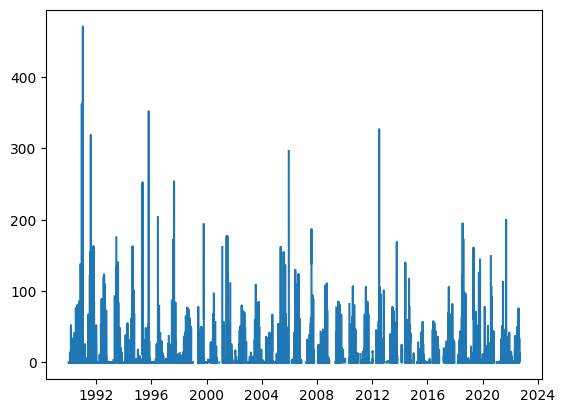

In [9]:
plt.plot(df['time'],df['prcp'])

In [10]:
data=df[['time','prcp']]
data.dropna(inplace=True)
data.columns=['ds','y']
data.head()

WARNING - (py.warnings._showwarnmsg) - C:\Users\Amey\AppData\Local\Temp\ipykernel_8552\1627567933.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)



,ds,y
0,1990-01-01,0.0
1,1990-01-02,0.0
2,1990-01-03,0.0
3,1990-01-04,0.0
4,1990-01-05,0.0


In [11]:
import torch


device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [12]:
model=NeuralProphet()  #untrained neuralprophet model
model.fit(data,freq='D',epochs=1000)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 87.774% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (214) is too small than the required number                     for the learning rate finder (246). The results might not be optimal.


Finding best initial lr:   0%|          | 0/246 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

,MAE,RMSE,Loss,RegLoss,epoch
0,43.679100,56.207737,0.524870,0.0,0
1,37.813251,49.541393,0.426265,0.0,1
2,32.622986,43.438942,0.341166,0.0,2
3,28.033237,37.875332,0.268293,0.0,3
4,23.991760,32.996296,0.207422,0.0,4
...,...,...,...,...,...
995,8.305974,16.952755,0.058740,0.0,995
996,8.293840,17.015862,0.058492,0.0,996
997,8.293385,16.966105,0.058496,0.0,997
998,8.314491,16.992939,0.058752,0.0,998


In [13]:
future=model.make_future_dataframe(data,periods=900)
forecast=model.predict(future)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 87.774% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 214it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2022-09-05,None,10.410638,5.045586,5.089185,0.275866
1,2022-09-06,None,9.809925,5.045648,5.104403,-0.340127
2,2022-09-07,None,10.454312,5.045711,5.119085,0.289516
3,2022-09-08,None,10.137734,5.045773,5.132656,-0.040694
4,2022-09-09,None,10.187840,5.045835,5.144720,-0.002713


In [14]:
plot1=model.plot(forecast)

In [15]:
plot1

FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 1.0)', 'width': 2},
              'mode': 'lines',
              'name': 'yhat1',
              'type': 'scatter',
              'uid': '467c256a-2306-45bb-a950-76de965fdb73',
              'x': array([datetime.datetime(2022, 9, 5, 0, 0),
                          datetime.datetime(2022, 9, 6, 0, 0),
                          datetime.datetime(2022, 9, 7, 0, 0), ...,
                          datetime.datetime(2025, 2, 18, 0, 0),
                          datetime.datetime(2025, 2, 19, 0, 0),
                          datetime.datetime(2025, 2, 20, 0, 0)], dtype=object),
              'y': array([10.410638 ,  9.809925 , 10.454312 , ...,  1.7358596,  2.386599 ,
                           2.074541 ], dtype=float32)},
             {'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'u

In [16]:
with open('Bhubneshwar_prec_model.pkl','wb') as f:
    pickle.dump(model,f)

In [14]:
model